#  Algoritma C4.5

# ANGGOTA KELOMPOK
- Fenny Jong (535210001)
- Kelvin Ferdinand (535210027)
- Jefri Jaya (535210048)

# Load Dataset

In [1]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
# Import train_test_split function
from sklearn.model_selection import train_test_split 
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics 
# load dataset
dataset = pd.read_csv("dataset no 3.csv", delimiter=',')
# splitting the dataset into input and output datasets
X = dataset.iloc[:, [0,1]].values
y = dataset.iloc[:, 2].values
dataset


,No,Pelatih,Kadang Sendiri,Latihan,Stamina,Mental,Menang
0,1,Pengertian,Ya,Rutin,Kuat,PD,Ya
1,2,Pengertian,Ya,Rutin,Kuat,Gerogi,Tidak
2,3,Pengertian,Ya,Rutin,Lemah,PD,Ya
3,4,Pengertian,Ya,Jarang,Lemah,PD,Ya
4,5,Pengertian,Ya,Tidak ada,Lemah,PD,Tidak
5,6,Pengertian,Tidak,Rutin,Kuat,PD,Ya
6,7,Pengertian,Tidak,Jarang,Lemah,Gerogi,Tidak
7,8,Menekan,Ya,Rutin,Lemah,PD,Ya
8,9,Menekan,Tidak,Rutin,Lemah,Gerogi,Tidak
9,10,Menekan,Ya,Jarang,Lemah,Gerogi,Tidak


# Transformasi Data

In [3]:
import pandas as pd

# membaca file dataset.csv
data = pd.read_csv('dataset no 3.csv')

# mengubah nilai pada kolom Pelatih menjadi numerik
data['Pelatih'] = data['Pelatih'].replace({'Pengertian': 0, 'Menekan': 1})

# mengubah nilai pada kolom Kadang Sendiri menjadi numerik
data['Kadang Sendiri'] = data['Kadang Sendiri'].replace({'Tidak': 0, 'Ya': 1})

# mengubah nilai pada kolom Latihan menjadi numerik
data['Latihan'] = data['Latihan'].replace({'Rutin': 0, 'Jarang': 1, 'Tidak ada': 2})

# mengubah nilai pada kolom Stamina menjadi numerik
data['Stamina'] = data['Stamina'].replace({'Kuat': 0, 'Lemah': 1})

# mengubah nilai pada kolom Mental menjadi numerik
data['Mental'] = data['Mental'].replace({'PD': 0, 'Gerogi': 1})

# mengubah nilai pada kolom Menang menjadi numerik
data['Menang'] = data['Menang'].replace({'Ya': 1, 'Tidak': 0})

# memisahkan data menjadi atribut dan target
X = data.drop(columns=['No', 'Pelatih', 'Menang'])
y = data['Menang']
data


,No,Pelatih,Kadang Sendiri,Latihan,Stamina,Mental,Menang
0,1,0,1,0,0,0,1
1,2,0,1,0,0,1,0
2,3,0,1,0,1,0,1
3,4,0,1,1,1,0,1
4,5,0,1,2,1,0,0
5,6,0,0,0,0,0,1
6,7,0,0,1,1,1,0
7,8,1,1,0,1,0,1
8,9,1,0,0,1,1,0
9,10,1,1,1,1,1,0


# Visualisasi Pohon Keputusan

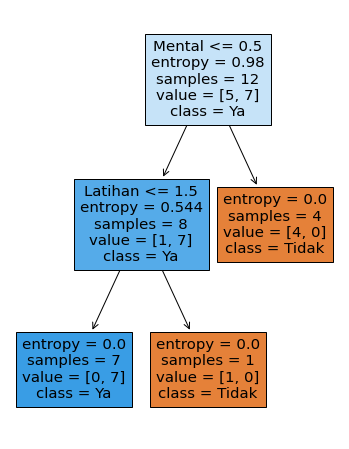

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# membuat model Decision Tree
dtc = DecisionTreeClassifier()
dtc = DecisionTreeClassifier(criterion='entropy')
dtc.fit(X, y)

# menampilkan decision tree
plt.figure(figsize=(6,8))
plot_tree(dtc, feature_names=X.columns, class_names=['Tidak', 'Ya'], filled=True)
plt.show()


# Scaling the Dataset & Spliting Dataset

In [5]:
from sklearn.preprocessing import StandardScaler
# splitting the dataaset into Training and Testing Data 
from sklearn.model_selection import train_test_split
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0) # 70% training and 30% test

# melakukan scaling pada data latih dan data uji
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


# Training the C4.5

In [6]:
# Membangun model pohon keputusan C4.5
dtc.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

# Predicting the Outputs

In [7]:
# melakukan prediksi pada data testing
# misalnya data test memiliki atribut Pelatih: Pengertian, Kadang Sendiri: Ya, 
# Latihan: Jarang, Stamina: lemah, dan Mental: gerogi
y_pred = dtc.predict(X_test)
print(y_pred)

[0 1 1 1]


In [8]:
if y_pred[0] == 1:
    print("Prediksi: Menang")
else:
    print("Prediksi: Kalah")

Prediksi: Kalah


# Accuracy

In [9]:
# importing the accuracy score
from sklearn.metrics import accuracy_score
# Calculate accuracy in percentage
accuracy = accuracy_score(y_test, y_pred) * 100
print("Akurasi: ", accuracy, "%")

Akurasi:  75.0 %


# Confusion Matrix

<AxesSubplot:>

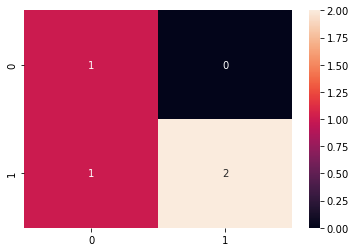

In [10]:
import seaborn as sns
# creating confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
# Making the Confusion Matrix
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm,annot=True)

# Mengukur Performa

In [11]:
from sklearn.metrics import classification_report
# membuat classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.67      1.00      0.80         2

    accuracy                           0.75         4
   macro avg       0.83      0.75      0.73         4
weighted avg       0.83      0.75      0.73         4

